In [2]:
# Import dependencies
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Import dependencies
from sqlalchemy import create_engine
engine = create_engine('postgresql://localhost:5432/Homework')
connection = engine.connect()

Text(0, 0.5, 'Frequency of Salary')

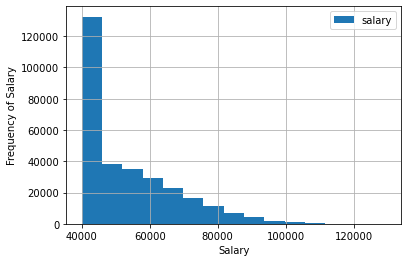

In [9]:
# Create dataframe from employees and salary table
employees_df = pd.read_sql('SELECT * from employees;',engine)
employees_df
salaries = pd.read_sql('SELECT * from salaries', engine)
salaries

# Create histogram to visualise the most common salary ranges for employees
salarieshist = pd.merge(employees_df, salaries, how='left', on='emp_no')
salarieshist.plot.hist(by='salary', bins = 15, grid=True)
plt.xlabel("Salary")
plt.ylabel("Frequency of Salary")

In [10]:
# Create dataframe from titles and merging salary info to title df
title_df = pd.read_sql('SELECT * from titles', engine)
title_df
avgsalary = pd.merge(salarieshist, title_df, how='left', left_on='emp_title_id', right_on='title_id')
avgsalary

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title_id,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,s0001,Staff
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422,e0002,Engineer
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973,e0002,Engineer
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,s0001,Staff
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000,e0003,Senior Engineer
...,...,...,...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28,69696,s0001,Staff
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26,75355,e0002,Engineer
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24,61886,s0001,Staff
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08,62772,s0001,Staff


<AxesSubplot:title={'center':'Average Salary by Title'}, xlabel='Title', ylabel='Salary'>

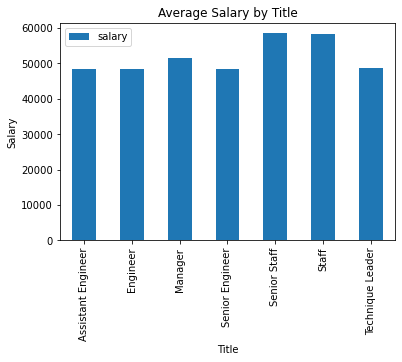

In [13]:
# Creating bar chart of average salary by title
averagesalarybytitle = avgsalary.groupby("title").agg({"salary" : "mean"}).plot(kind='bar')
plt.title("Average Salary by Title")
plt.xlabel("Title")
plt.ylabel("Salary")
averagesalarybytitle

In [14]:
#Looking up employee ID 499942 to see the results
oneemployee = pd.merge(salarieshist, title_df, how='left', left_on='emp_title_id', right_on='title_id')
oneemployee.loc[oneemployee['emp_no'] == '499942']

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title_id,title
168736,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10,40000,e0004,Technique Leader
